# Imports

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from src.get_data import *
from src.preprocessing import *
from src.create_output import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [2]:
bd_full = pd.read_csv('data/business.csv')
bd_full['attributes_AgesAllowed'].unique()

array([nan, '21plus', 'allages', '19plus', '18plus'], dtype=object)

In [3]:
b_data, u_data, reviews = get_training_data(verbose=True)
v_queries = get_validation_reviews()

X, y = construct_design_matrix(b_data, u_data, reviews, verbose=True)
X_valid, y_valid = construct_design_matrix(b_data, u_data, v_queries, verbose=True)

b_data.head()

========== Feature 'attributes_AgesAllowed' ==========
TYPE: string. Doing one-hot encoding.

========== Feature 'attributes_GoodForKids' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_OutdoorSeating' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_RestaurantsDelivery' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_RestaurantsGoodForGroups' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_RestaurantsPriceRange2' ==========
TYPE: numeric.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_RestaurantsReservations' ==========
TYPE: 

,attributes_GoodForKids,attributes_OutdoorSeating,attributes_RestaurantsDelivery,attributes_RestaurantsGoodForGroups,attributes_RestaurantsPriceRange2,attributes_RestaurantsReservations,stars,attributes_AgesAllowedNAN,attributes_AgesAllowed21PLUS,attributes_AgesAllowedALLAGES,attributes_AgesAllowed19PLUS,attributes_AgesAllowed18PLUS,attributes_WiFiNO,attributes_WiFiFREE,attributes_WiFiNAN,attributes_WiFiPAID
business_id,,,,,,,,,,,,,,,,
KuxDPl6UYNLxFChPm0_MNw,0.0,1.0,0.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
6SAfQKe2oM5g_EtcYXyAMg,1.0,1.0,0.0,1.0,1.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
upB0RQl-l529IVwgOpwOQQ,0.0,1.0,0.0,1.0,1.0,0.0,4.5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
TulmRC5V0--dnXYd_GOSvA,1.0,0.0,0.0,1.0,2.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
yqYtY3-Po4OVPafA9Z-Xyw,1.0,0.0,0.0,1.0,2.0,1.0,3.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [4]:
X_test = construct_test_matrix(b_data, u_data, verbose=True)

Constructing test feature-matrix now.
0/50078 done
10000/50078 done
20000/50078 done
30000/50078 done
40000/50078 done
50000/50078 done
Finished!


# Preprocessing / dimensionality reduction

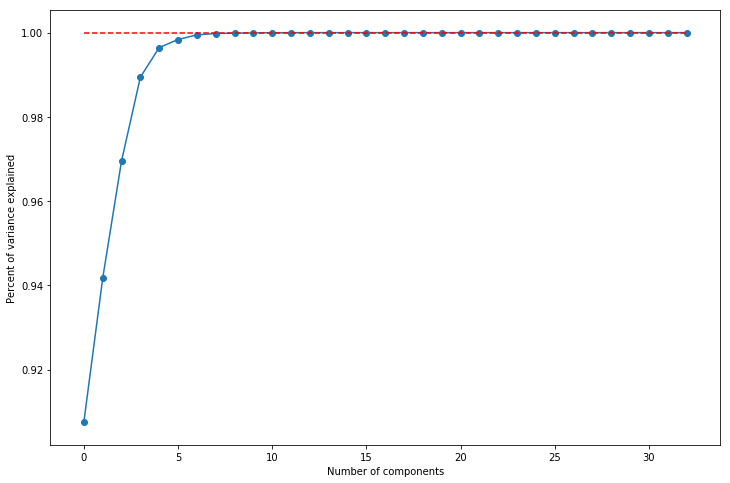

Using 10 components - 0.999978 of variance explained.


In [7]:
X_n = normalize_columns(X)
X_valid_n = normalize_columns(X_valid)

Z = get_PCA_matrix(X, n_components=10, plot_expl_variance=True, verbose=True)
X_pca = np.dot(X, Z.T)
X_valid_pca = np.dot(X_valid, Z.T)

# Hyperparameter Tuning

In [12]:
results = dict()

def rmse(y1, y2):
    return np.sqrt(np.mean((y1-y2)**2))

In [17]:
min_validation_mse = (float('inf'), 0.1)
for penalty_constant in np.linspace(0, 10, 1000):
    clf = Ridge(alpha=penalty_constant)
    clf.fit(X, y)
    # training error
    y_pred_train = clf.predict(X)
    mse_train = rmse(y, y_pred_train)
    #print('{}  <- Training RMSE with alpha={}'.format(mse_train, penalty_constant))

    # validation error
    y_pred_valid = clf.predict(X_valid)
    mse_valid = rmse(y_valid, y_pred_valid)
    #print('{}  <- Validation RMSE with alpha={}'.format(mse_valid, penalty_constant))
    if mse_valid < min_validation_mse[0]:
        print('{}  <- New min RMSE, updated alpha to {}'.format(mse_valid, penalty_constant))
        min_validation_mse = (mse_valid, penalty_constant)
    if penalty_constant - np.floor(penalty_constant) < 0.01:
        print(f"Making progress: penalty constant of {penalty_constant}, rmse of {mse_valid}")
opt_penalty = min_validation_mse[1]
print("Optimal penalty constant of {} found".format(opt_penalty))

1.052296177102424  <- New min RMSE, updated alpha to 0.0
Making progress: penalty constant of 0.0, rmse of 1.052296177102424
1.052268472215368  <- New min RMSE, updated alpha to 0.01001001001001001
1.052268470218081  <- New min RMSE, updated alpha to 0.02002002002002002
1.0522684682265266  <- New min RMSE, updated alpha to 0.03003003003003003
1.052268466240692  <- New min RMSE, updated alpha to 0.04004004004004004
1.052268464260564  <- New min RMSE, updated alpha to 0.050050050050050046
1.0522684622861296  <- New min RMSE, updated alpha to 0.06006006006006006
1.0522684603173755  <- New min RMSE, updated alpha to 0.07007007007007007
1.052268458354289  <- New min RMSE, updated alpha to 0.08008008008008008
1.052268456396857  <- New min RMSE, updated alpha to 0.09009009009009009
1.0522684544450664  <- New min RMSE, updated alpha to 0.10010010010010009
1.0522684524989048  <- New min RMSE, updated alpha to 0.11011011011011011
1.0522684505583588  <- New min RMSE, updated alpha to 0.1201201201

1.0522682827919276  <- New min RMSE, updated alpha to 1.1211211211211212
1.0522682813577307  <- New min RMSE, updated alpha to 1.1311311311311312
1.0522682799279948  <- New min RMSE, updated alpha to 1.1411411411411412
1.0522682785027102  <- New min RMSE, updated alpha to 1.1511511511511512
1.052268277081867  <- New min RMSE, updated alpha to 1.1611611611611612
1.0522682756654553  <- New min RMSE, updated alpha to 1.1711711711711712
1.0522682742534653  <- New min RMSE, updated alpha to 1.1811811811811812
1.0522682728458872  <- New min RMSE, updated alpha to 1.1911911911911912
1.052268271442711  <- New min RMSE, updated alpha to 1.2012012012012012
1.0522682700439274  <- New min RMSE, updated alpha to 1.2112112112112112
1.0522682686495262  <- New min RMSE, updated alpha to 1.2212212212212212
1.0522682672594978  <- New min RMSE, updated alpha to 1.2312312312312312
1.0522682658738327  <- New min RMSE, updated alpha to 1.2412412412412412
1.0522682644925212  <- New min RMSE, updated alpha to

1.0522681477811089  <- New min RMSE, updated alpha to 2.2422422422422423
1.0522681467902846  <- New min RMSE, updated alpha to 2.2522522522522523
1.0522681458029528  <- New min RMSE, updated alpha to 2.2622622622622623
1.0522681448191067  <- New min RMSE, updated alpha to 2.2722722722722724
1.052268143838738  <- New min RMSE, updated alpha to 2.2822822822822824
1.05226814286184  <- New min RMSE, updated alpha to 2.2922922922922924
1.0522681418884046  <- New min RMSE, updated alpha to 2.3023023023023024
1.0522681409184247  <- New min RMSE, updated alpha to 2.3123123123123124
1.052268139951893  <- New min RMSE, updated alpha to 2.3223223223223224
1.052268138988802  <- New min RMSE, updated alpha to 2.3323323323323324
1.0522681380291445  <- New min RMSE, updated alpha to 2.3423423423423424
1.052268137072913  <- New min RMSE, updated alpha to 2.3523523523523524
1.0522681361201  <- New min RMSE, updated alpha to 2.3623623623623624
1.0522681351706986  <- New min RMSE, updated alpha to 2.3723

1.0522680569216725  <- New min RMSE, updated alpha to 3.3633633633633635
1.0522680562794153  <- New min RMSE, updated alpha to 3.3733733733733735
1.0522680556399167  <- New min RMSE, updated alpha to 3.3833833833833835
1.0522680550031709  <- New min RMSE, updated alpha to 3.3933933933933935
1.052268054369172  <- New min RMSE, updated alpha to 3.4034034034034035
1.0522680537379145  <- New min RMSE, updated alpha to 3.4134134134134135
1.0522680531093926  <- New min RMSE, updated alpha to 3.4234234234234235
1.0522680524836012  <- New min RMSE, updated alpha to 3.4334334334334335
1.0522680518605338  <- New min RMSE, updated alpha to 3.4434434434434436
1.0522680512401856  <- New min RMSE, updated alpha to 3.4534534534534536
1.0522680506225504  <- New min RMSE, updated alpha to 3.4634634634634636
1.0522680500076227  <- New min RMSE, updated alpha to 3.4734734734734736
1.052268049395397  <- New min RMSE, updated alpha to 3.4834834834834836
1.0522680487858682  <- New min RMSE, updated alpha to

1.052268000186587  <- New min RMSE, updated alpha to 4.504504504504505
1.0522679998251236  <- New min RMSE, updated alpha to 4.514514514514515
1.0522679994658488  <- New min RMSE, updated alpha to 4.524524524524525
1.0522679991087576  <- New min RMSE, updated alpha to 4.534534534534535
1.052267998753846  <- New min RMSE, updated alpha to 4.544544544544545
1.0522679984011094  <- New min RMSE, updated alpha to 4.554554554554555
1.0522679980505438  <- New min RMSE, updated alpha to 4.564564564564565
1.052267997702145  <- New min RMSE, updated alpha to 4.574574574574575
1.0522679973559081  <- New min RMSE, updated alpha to 4.584584584584585
1.0522679970118294  <- New min RMSE, updated alpha to 4.594594594594595
1.052267996669904  <- New min RMSE, updated alpha to 4.604604604604605
1.0522679963301282  <- New min RMSE, updated alpha to 4.614614614614615
1.0522679959924977  <- New min RMSE, updated alpha to 4.624624624624625
1.0522679956570076  <- New min RMSE, updated alpha to 4.634634634634

1.052267971951636  <- New min RMSE, updated alpha to 5.655655655655655
1.0522679718155588  <- New min RMSE, updated alpha to 5.665665665665665
1.0522679716812284  <- New min RMSE, updated alpha to 5.675675675675675
1.0522679715486418  <- New min RMSE, updated alpha to 5.685685685685685
1.0522679714177952  <- New min RMSE, updated alpha to 5.6956956956956954
1.0522679712886853  <- New min RMSE, updated alpha to 5.7057057057057055
1.0522679711613088  <- New min RMSE, updated alpha to 5.7157157157157155
1.0522679710356626  <- New min RMSE, updated alpha to 5.7257257257257255
1.0522679709117433  <- New min RMSE, updated alpha to 5.7357357357357355
1.0522679707895473  <- New min RMSE, updated alpha to 5.7457457457457455
1.0522679706690719  <- New min RMSE, updated alpha to 5.7557557557557555
1.052267970550313  <- New min RMSE, updated alpha to 5.7657657657657655
1.052267970433268  <- New min RMSE, updated alpha to 5.7757757757757755
1.0522679703179332  <- New min RMSE, updated alpha to 5.78

In [22]:
min_tolerance = (float('inf'), 1)
for curr_tol in [1, 0.5, 0.2, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]:
    clf = Ridge(alpha=penalty_constant, tol=curr_tol)
    clf.fit(X, y)
    # training error
    y_pred_train = clf.predict(X)
    mse_train = rmse(y, y_pred_train)
    print('{}  <- Training RMSE with tol={}'.format(mse_train, curr_tol))

    # validation error
    y_pred_valid = clf.predict(X_valid)
    mse_valid = rmse(y_valid, y_pred_valid)
    print('{}  <- Validation RMSE with tol={}'.format(mse_valid, curr_tol))
    if mse_valid < min_tolerance[0]:
        print('{}  <- New min RMSE, updated tol to {}'.format(mse_valid, curr_tol))
        min_tolerance = (mse_valid, curr_tol)
opt_tol = min_tolerance[1]
print("Optimal tolerance of {} found".format(opt_tol))

1.124265405458296  <- Training RMSE with tol=1
1.2283966709660599  <- Validation RMSE with tol=1
1.2283966709660599  <- New min RMSE, updated tol to 1
1.124265405458296  <- Training RMSE with tol=0.5
1.2283966709660599  <- Validation RMSE with tol=0.5
1.124265405458296  <- Training RMSE with tol=0.2
1.2283966709660599  <- Validation RMSE with tol=0.2
1.124265405458296  <- Training RMSE with tol=0.1
1.2283966709660599  <- Validation RMSE with tol=0.1
1.124265405458296  <- Training RMSE with tol=0.01
1.2283966709660599  <- Validation RMSE with tol=0.01
1.124265405458296  <- Training RMSE with tol=0.001
1.2283966709660599  <- Validation RMSE with tol=0.001
1.124265405458296  <- Training RMSE with tol=0.0001
1.2283966709660599  <- Validation RMSE with tol=0.0001
1.124265405458296  <- Training RMSE with tol=1e-05
1.2283966709660599  <- Validation RMSE with tol=1e-05
1.124265405458296  <- Training RMSE with tol=1e-06
1.2283966709660599  <- Validation RMSE with tol=1e-06
1.124265405458296  <-

# Regression

In [23]:
print(f"opt_penalty_constant: {opt_penalty}")

opt_penalty_constant: 6.506506506506507


In [31]:
clf_cv = RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 2.5, opt_penalty, 10])
clf_cv.fit(X, y)
y_cv_test = clf_cv.predict(X_test)
y_cv_cleaned = format_output(y_cv_test)
write_output(y_cv_cleaned, 'ridge_cv_regression')
print("wrote output")

# training error
y_cv_pred_train = clf_cv.predict(X)
mse_cv_train = rmse(y, y_cv_pred_train)
print('%f  <- Training RMSE' % mse_cv_train)

wrote output
1.005748  <- Training RMSE


In [32]:
clf = Ridge(alpha=opt_penalty, tol=0.0001)
clf.fit(X, y)
y_test = clf.predict(X_test)
y_cleaned = format_output(y_test)
write_output(y_cleaned, 'ridge_regression')
print("wrote output")



wrote output


In [25]:
clf_n = Ridge(alpha=opt_penalty)
clf_n.fit(X_n, y)
y_n_test = clf_n.predict(X_test)
y_n_cleaned = format_output(y_test)
write_output(y_n_cleaned, 'ridge_regression_normalized')
print("wrote output")



wrote output


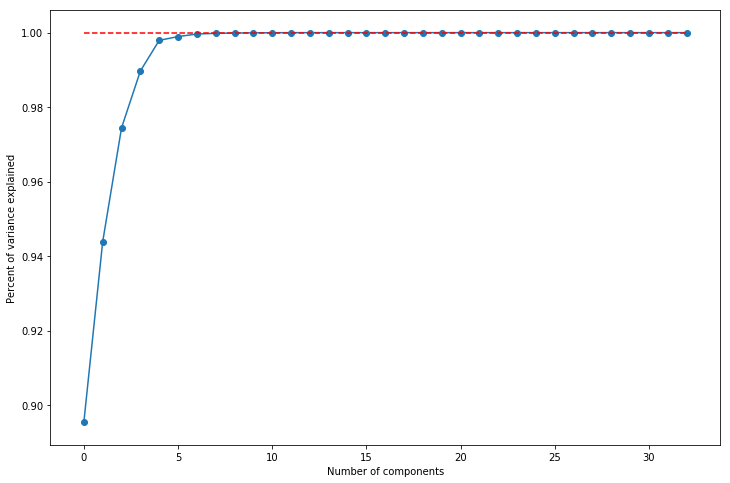

Using 10 components - 0.999983 of variance explained.
wrote output


In [27]:
clf_pca = Ridge(alpha=opt_penalty)
clf_pca.fit(X_pca, y)
Z = get_PCA_matrix(X_test, n_components=10, plot_expl_variance=True, verbose=True)
X_pca_test = np.dot(X_test, Z.T)
y_pca_test = clf_pca.predict(X_pca_test)
y_pca_cleaned = format_output(y_pca_test)
write_output(y_pca_cleaned, 'svm_optimal_c_pca')
print("wrote output")



In [28]:
# training error
y_pred_train = clf.predict(X)
mse_train = rmse(y, y_pred_train)
print('%f  <- Training RMSE' % mse_train)

# training error (normalized columns)
y_pred_train_norm = clf_n.predict(X_n)
mse_train_norm = rmse(y, y_pred_train_norm)
print('%f  <- Training RMSE (norm)' % mse_train_norm)

# training error (PCA)
y_pred_train_pca = clf_pca.predict(X_pca)
mse_train_pca = rmse(y, y_pred_train_pca)
print('%f  <- Training RMSE (PCA)' % mse_train_pca)

print('')

# validation error
y_pred_valid = clf.predict(X_valid)
mse_valid = rmse(y_valid, y_pred_valid)
print('%f  <- Validation RMSE' % mse_valid)

# validation error (normalized columns)
y_pred_valid_norm = clf_n.predict(X_valid_n)
mse_valid_norm = rmse(y_valid, y_pred_valid_norm)
print('%f  <- Validation RMSE (norm)' % mse_valid_norm)

# validation error (PCA)
y_pred_valid_pca = clf_pca.predict(X_valid_pca)
mse_valid_pca = rmse(y_valid, y_pred_valid_pca)
print('%f  <- Validation RMSE (PCA)' % mse_valid_pca)

1.005748  <- Training RMSE
1.006168  <- Training RMSE (norm)
1.149530  <- Training RMSE (PCA)

1.052268  <- Validation RMSE
1.087957  <- Validation RMSE (norm)
1.266225  <- Validation RMSE (PCA)


# Inspect weight vector

num weights ~= 0: 9


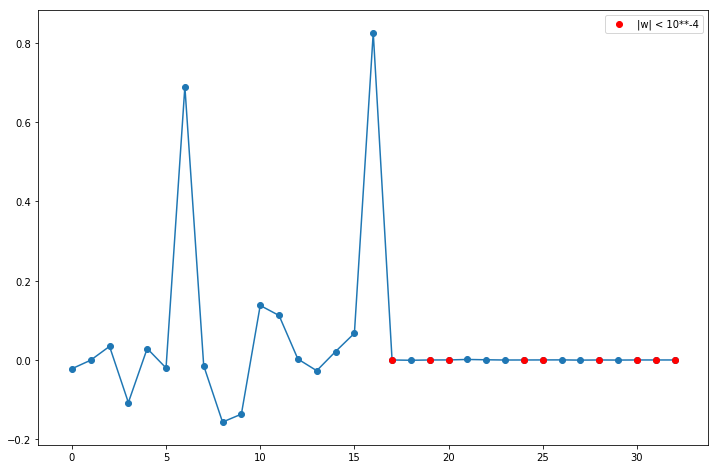

In [99]:
w = clf.coef_
xs = range(len(w))

tiny_weights = np.argwhere(abs(w) <= 10**-4)
print('num weights ~= 0: %d' % len(tiny_weights))


f, ax = plt.subplots(figsize=(12, 8))
ax.plot(xs, w)
ax.scatter(xs, w)
ax.scatter(tiny_weights, w[tiny_weights], color='red', zorder=5, label='|w| < 10**-4')
plt.legend()
plt.show()

In [102]:
all_columns = np.append(b_data.columns, u_data.columns)

for i, col in enumerate(all_columns):
    if w[i] < 0:
        print('%f  <- |w| for %s' % (w[i], col))
    else:
        print(' %f  <- |w| for %s' % (w[i], col))

-0.022158  <- |w| for attributes_GoodForKids
-0.000530  <- |w| for attributes_OutdoorSeating
 0.034338  <- |w| for attributes_RestaurantsDelivery
-0.107442  <- |w| for attributes_RestaurantsGoodForGroups
 0.028911  <- |w| for attributes_RestaurantsPriceRange2
-0.020178  <- |w| for attributes_RestaurantsReservations
 0.689842  <- |w| for stars
-0.014527  <- |w| for attributes_AgesAllowedNAN
-0.156745  <- |w| for attributes_AgesAllowed21PLUS
-0.136656  <- |w| for attributes_AgesAllowedALLAGES
 0.137557  <- |w| for attributes_AgesAllowed19PLUS
 0.112263  <- |w| for attributes_AgesAllowed18PLUS
 0.002355  <- |w| for attributes_WiFiNO
-0.027051  <- |w| for attributes_WiFiFREE
 0.021345  <- |w| for attributes_WiFiNAN
 0.067386  <- |w| for attributes_WiFiPAID
 0.826106  <- |w| for average_stars
-0.000019  <- |w| for compliment_cool
-0.000743  <- |w| for compliment_cute
-0.000019  <- |w| for compliment_funny
 0.000086  <- |w| for compliment_hot
 0.001274  <- |w| for compliment_list
 0.000479  